In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


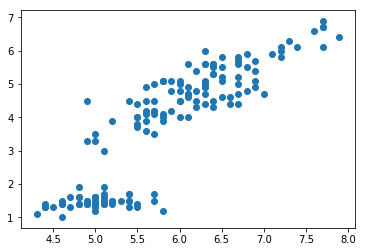

In [3]:
x1 = df['Sepal.Length'].values
x2 = df['Petal.Length'].values

plt.scatter(x1, x2)
plt.show()

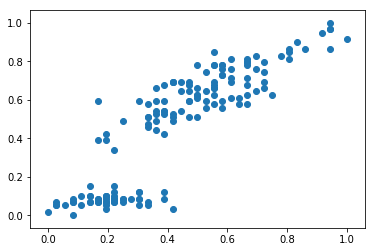

In [4]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

x = df[['Sepal.Length', 'Petal.Length']].values
x[:, 0] = normalize(x[:, 0])
x[:, 1] = normalize(x[:, 1])

plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [5]:
df['Species'].values == 'setosa'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [6]:
y = (df['Species'].values == 'setosa').astype('int')
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

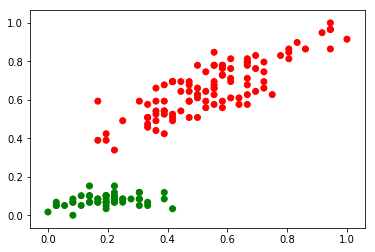

In [7]:
colors = np.array(['r', 'g'])

plt.scatter(x[:, 0], x[:, 1], c=colors[y])
plt.show()

In [8]:
x.shape

(150, 2)

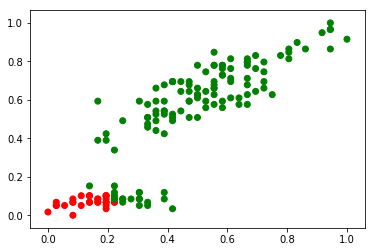

In [9]:
w = np.array(
    [
        [0.3],
        [0.4]
    ]
)
b = -0.1

u = np.matmul(x, w) + b
y = np.where(u > 0.0, 1, 0) # 계단함수

plt.scatter(x[:, 0], x[:, 1], c=colors[y.reshape(-1)])
plt.show()

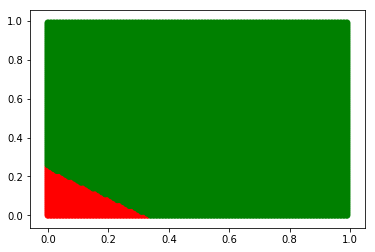

In [10]:
x1, x2 = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
a = np.stack([x1.reshape(-1), x2.reshape(-1)], axis=1)

u = np.matmul(a, w) + b
y = np.where(u > 0.0, 1, 0) # 계단함수

plt.scatter(a[:, 0], a[:, 1], c=colors[y.reshape(-1)])
plt.show()

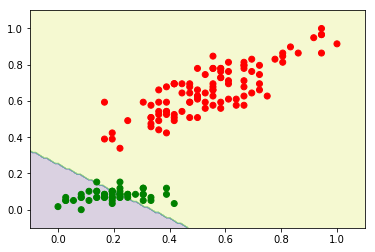

In [11]:
x_data = df[['Sepal.Length', 'Petal.Length']].values
x_data[:, 0] = normalize(x_data[:, 0])
x_data[:, 1] = normalize(x_data[:, 1])
y_data = (df['Species'].values == 'setosa').astype('int')

# 예측을 위한 범위 지정
x1, x2 = np.meshgrid(np.arange(-0.1, 1.1, 0.01), np.arange(-0.1, 1.1, 0.01))
a = np.stack([x1.reshape(-1), x2.reshape(-1)], axis=1)

# 예측 범위 내의 예측값
u = np.matmul(a, w) + b
y = np.where(u > 0.0, 1, 0) # 계단함수

plt.contourf(x1, x2, y.reshape(x1.shape), alpha=0.2)
plt.scatter(x_data[:, 0], x_data[:, 1], c=colors[y_data])
plt.show()

In [12]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_uniform([2, 1]))
b = tf.Variable(tf.random_uniform([1]))

u = tf.matmul(x, w) + b
z = tf.sigmoid(u)

loss = -tf.reduce_sum(y * tf.log(z) + (1 - y) * tf.log(1 - z))
train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

0
w = [0.322919, 0.066374]
b = [0.178671]
loss = 120.136482
accuracy = 0.333333


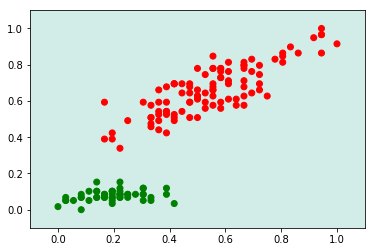

1
w = [-1.108859, -1.837970]
b = [-1.716230]
loss = 112.955948
accuracy = 0.666667


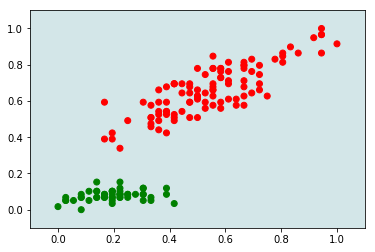

2
w = [-0.743753, -1.757018]
b = [0.350086]
loss = 60.138744
accuracy = 0.920000


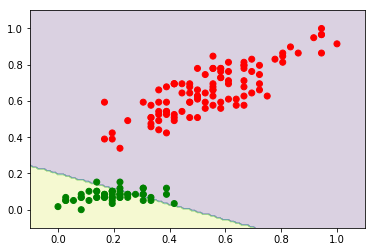

3
w = [-1.087487, -2.394361]
b = [0.386514]
loss = 52.132126
accuracy = 0.806667


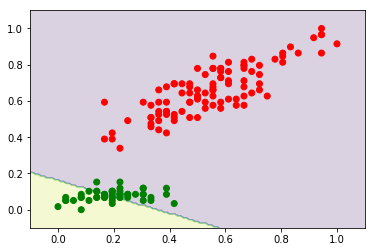

4
w = [-1.200253, -2.761251]
b = [0.876302]
loss = 45.890175
accuracy = 1.000000


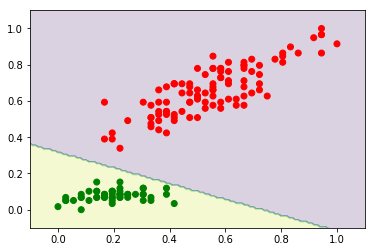

5
w = [-1.427247, -3.229859]
b = [0.957441]
loss = 41.059200
accuracy = 1.000000


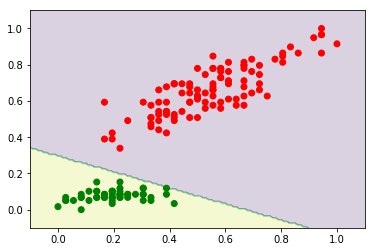

6
w = [-1.546766, -3.567779]
b = [1.240883]
loss = 37.223431
accuracy = 1.000000


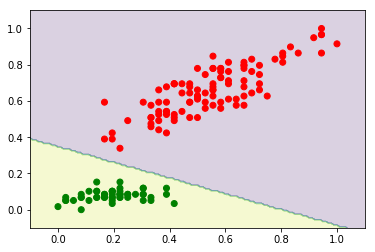

7
w = [-1.694035, -3.920373]
b = [1.376181]
loss = 34.110645
accuracy = 1.000000


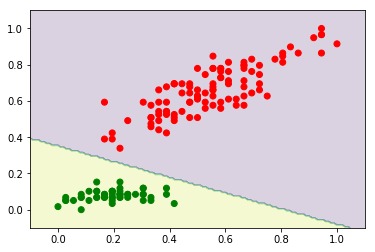

8
w = [-1.807519, -4.225060]
b = [1.547588]
loss = 31.524996
accuracy = 1.000000


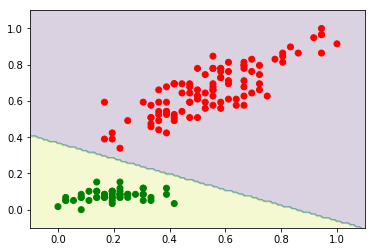

9
w = [-1.916098, -4.513735]
b = [1.683646]
loss = 29.339674
accuracy = 1.000000


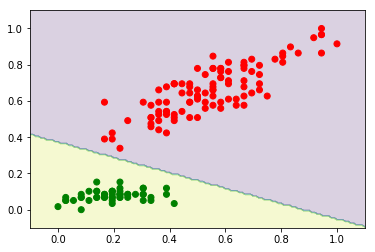

10
w = [-2.012631, -4.780317]
b = [1.812792]
loss = 27.467546
accuracy = 1.000000


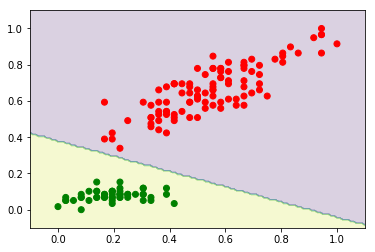

In [13]:
session = tf.Session()
session.run(tf.global_variables_initializer())

data = {
    x: x_data,
    y: y_data.reshape(-1, 1)
}

def draw(index):
    print(index)

    # Parameters
    print('w = [%f, %f]' % tuple(session.run(w)))
    print('b = [%f]' % session.run(b))

    # Error
    print('loss = %f' % session.run(loss, feed_dict=data))

    # Accuracy
    predict = session.run(z, feed_dict={ x: x_data }) > 0.5
    correct = predict.astype('int').reshape(-1) == y_data
    print('accuracy = %f' % np.mean(correct))

    # 예측을 위한 범위 지정
    x1, x2 = np.meshgrid(np.arange(-0.1, 1.1, 0.01), np.arange(-0.1, 1.1, 0.01))
    a = np.stack([x1.reshape(-1), x2.reshape(-1)], axis=1)

    # 예측 범위 내의 예측값
    predict = session.run(z, feed_dict={ x: a }) > 0.5

    plt.contourf(x1, x2, predict.reshape(x1.shape), alpha=0.2)
    plt.scatter(x_data[:, 0], x_data[:, 1], c=colors[y_data])
    plt.show()

draw(0)

for i in range(10):
    session.run(train, feed_dict=data)
    draw(i + 1)